# Цель и задачи исследования объявлений о продаже квартир

Цель - выявить рыночную стоимость жилых объектов и их основные параметры, чтобы в перспективе отслеживать аномалии и мошенническую деятельность.

Данные -- архив объявлений о продаже квартир в крупном городе и соседних населённых пунктов за несколько лет. Часть данных вписаны юзером, часть — собрана автоматически с картографических приложений. 

План: 
- обработать пропущенные значения, 
- привести данные к нужным типам, 
- определить типичные параметры квартир, 
- исследовать зависимость параметров (площадь, цена, количество комнат, высота потолков) от удаленности от центра, 
- построить диаграммы рассеивания, гистрограммы и боксплоты.

## Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('real_estate_data.csv', sep='\t')
df_original = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 500)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Некоторые данные отсутствуют для колонок с количеством дней объевлений, информации про ближайшие озера и парки, расстояение до центра и аэропорта, инфо про балконы, площадь кухни, про аппартаменты, район, высоту потолков. 
Количество пропусков по расстояниям одинаковое, что может указывать на какую-то техническую ошибку выгрузки данных. Пропуски в колонках про балкон, скорее всего, означают отсутствие балкона. 

## Предобработка данных

In [4]:
df['ceiling_height'].describe() 
# Максимальная высота потолка - 100 метров, а минимальная - 1

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

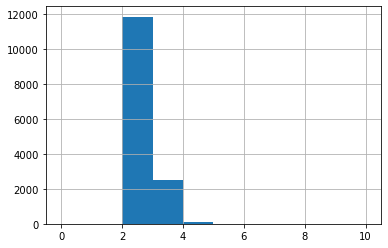

In [5]:
df['ceiling_height'].hist(range=(0,10)) 
# Согласно гистограмме, большая часть значений попадает в промежуток между двумя и тремя метрами. 

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.650000)
# почти 40% процентов строк с пропущенным значением высоты потолка
# заменим пропуски в колонке с высотой потолка на медианное значение. Оно не сильно отличается от среднего значения, 
# но меньше учитывает выбросы. 
# Возможно, пропуски появились из-за технической проблемы выгрузки данных. 
df['ceiling_height'].isna().sum()

0

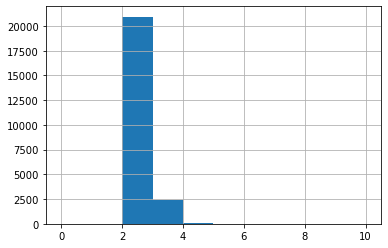

In [115]:
df['ceiling_height'].hist(range=(0,10))
plt.show()

In [8]:
df[df['floors_total'].isna()]
# 86 строк без кол-ва этажей в доме
# стоит заменить значения не на медианные, а на unknown, потому что этаж квартиры обычно сильно влияет на стоимость, 
# поэтому тут нужны точные данные, а не примерные. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [9]:
df['floors_total'] = df['floors_total'].fillna('unknown')
df['floors_total'].isna().sum()

0

In [10]:
df[df['living_area'].isna()] 
# Примерно 10% строк без значения жилой площади. 
# Её можно посчитать, вычив площадь кухни из общей площади. Стоит учитывать кол-во комнат в квартире, 
# потому что от этого, обычно, сильно меняется процент жилой площади. Так как иногда отсутствуют оба показателя, 
# можно рассчитать коэффициент жилой площади в зависимости от количества комнат и 
# применить его на все пропущенные значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [11]:
df['rooms'].value_counts() # посмотрим, есть ли сильно странные значения по количеству комнат. 
# Есть значения 0. 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [12]:
df['liv_corr'] = df['living_area'] / df['total_area'] # процент жилой площади по всем строкам
liv_corr_median = df.pivot_table(index='rooms', values='liv_corr', aggfunc='median') #медиана gо проценту жилой площади 
#сгруппированная по кол-ву комнат
df = df.join(liv_corr_median, on='rooms',rsuffix='_y') # добавляем столбец по колонке с кол-вом комнат
df['living_area_medium'] = df['total_area'] * df['liv_corr_y'] # добавляем столбец со медианной жилой площадью 
# в зависимости от кол-ва комнат, чтобы подставить их в пустые значения
#df[df['living_area'].isna()]['living_area'] = df['living_area_medium']
df.loc[df['living_area'].isna(),'living_area'] = df.loc[df['living_area'].isna(), 'living_area_medium']
df['living_area'].isna().sum()

0

In [13]:
df['is_apartment'].value_counts() #NaN, пожоже, означает просто "не апартаменты", 
#потому что, обычно, если это апартаменты, это указывается. Если нет, то либо False, либо пропуск.
# Оставим пропуски как есть. 

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
#повторяем для кухни те же рассчеты, что и для жилой площади
df['kitchen_corr'] = df['kitchen_area'] / df['total_area'] # процент кухонной площади от общей по всем строкам
kitchen_corr_median = df.pivot_table(index='rooms', values='kitchen_corr', aggfunc='median') #медиана gо проценту кухонной площади 
#сгруппированная по кол-ву комнат
df = df.join(kitchen_corr_median, on='rooms',rsuffix='_y') # добавляем столбец по колонке с кол-вом комнат
df['kitchen_area_medium'] = df['total_area'] * df['kitchen_corr_y'] # добавляем столбец со средней кухонной площадью 
# в зависимости от кол-ва комнат, чтобы подставить их в пустые значения
df.loc[df['kitchen_area'].isna(),'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'kitchen_area_medium']
df['kitchen_area'].isna().sum()

197

In [15]:
# все квартиры с нулевым количеством комнат (наверное, студии) не имеют данных о метраже кухни, 
# поэтому пропуски не заполнились
# Раз нет отдельной кухни, заменим значения для таких квартир нулями. 
df.loc[(df['rooms'] == 0) & (df['kitchen_area'].isna()), 'kitchen_area'] = 0

In [16]:
df['kitchen_area'].isna().sum() # теперь пропусков по кухне нет 

0

In [17]:
df['balcony'] = df['balcony'].fillna(0) #заменим нулями пустые значения по балконам, потому что, скорее всего, их нет, поэтому
#и данные по ним не заполнялись

In [18]:
df['balcony'].isna().sum()

0

In [19]:
df[df['locality_name'].isna()].head() # не видим возможности найти название через другие колонки, 
#потому заменим на "неизвестно"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_corr,liv_corr_y,living_area_medium,kitchen_corr,kitchen_corr_y,kitchen_area_medium
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,0.621787,0.631667,51.607167,0.107711,0.128571,10.504286
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,0.532500,0.631667,50.533333,0.232500,0.128571,10.285714
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,0.365340,0.482488,20.602237,0.250585,0.247839,10.582709
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,0.530449,0.585009,36.504570,0.131410,0.161075,10.051086
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,0.662366,0.585009,27.202925,0.139785,0.161075,7.489992


In [20]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')
df['locality_name'].isna().sum()

0

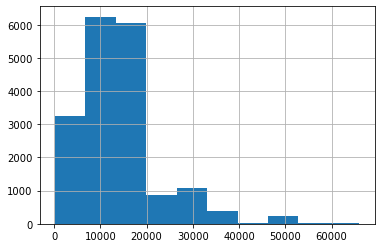

In [21]:
df['cityCenters_nearest'].hist()

In [22]:
df_original[df_original['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,False,False,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df['cityCenters_nearest'] = df['cityCenters_nearest']/1000 # переведем метры в километры

In [24]:
city_dist = df.pivot_table(index='locality_name', values ='cityCenters_nearest', aggfunc='median')
city_dist

,cityCenters_nearest
locality_name,
Зеленогорск,53.3810
Колпино,32.0180
Красное Село,29.1405
Кронштадт,49.5750
Ломоносов,51.6770
Павловск,32.6830
Петергоф,33.7710
Пушкин,27.9305
Санкт-Петербург,12.2445


In [25]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean        14.191278
std          8.608386
min          0.181000
25%          9.238000
50%         13.098500
75%         16.293000
max         65.968000
Name: cityCenters_nearest, dtype: float64

In [26]:
df['locality_name'] = df['locality_name'].astype('str')
# нужно перевести значения в этой кололнке к значению строки str, 
# чтобы работать с текстом

In [27]:
def locality_group(words):
    for word in words:
        if 'Санкт-Петербург' in words:
            return 'Санкт-Петербург'
        return 'другое'
df['locality_group'] = df['locality_name'].apply(locality_group)
df['locality_group'].value_counts()

Санкт-Петербург    15721
другое              7978
Name: locality_group, dtype: int64

In [28]:
city_dest_median = df.pivot_table(index='locality_group', values ='cityCenters_nearest', aggfunc='median') 
# заменим пустые значения в колонке с расстоянием до центра медианным значением по категориям "Санкт-Петербург" и другие
# населенные пункты 
df = df.join(city_dest_median, on='locality_group', rsuffix='_y')
df.loc[df['cityCenters_nearest'].isna(),'cityCenters_nearest'] = df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest_y']

In [29]:
df['cityCenters_nearest'].isna().sum()

0

In [30]:
df[df['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_corr,liv_corr_y,living_area_medium,kitchen_corr,kitchen_corr_y,kitchen_area_medium,locality_group,cityCenters_nearest_y
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,NaN,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,NaN,0.472222,0.631667,68.220000,0.231481,0.128571,13.885714,Санкт-Петербург,12.2445
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,41.886654,22,NaN,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11.634,0.0,NaN,0.0,NaN,NaN,NaN,0.585009,41.886654,0.263966,0.161075,11.532977,Санкт-Петербург,12.2445
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22,19.299520,3,NaN,False,False,9.913545,1.0,Санкт-Петербург,30471.0,11.603,1.0,620.0,1.0,1152.0,NaN,NaN,0.482488,19.299520,NaN,0.247839,9.913545,Санкт-Петербург,12.2445
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9,30.300000,7,NaN,False,False,7.000000,0.0,Санкт-Петербург,30011.0,12.872,0.0,NaN,0.0,NaN,NaN,0.598814,0.585009,29.601463,0.138340,0.161075,8.150400,Санкт-Петербург,12.2445
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24,29.700000,9,NaN,False,False,8.300000,2.0,Санкт-Петербург,15114.0,12.702,0.0,NaN,0.0,NaN,NaN,0.570058,0.585009,30.478976,0.159309,0.161075,8.392013,Санкт-Петербург,12.2445


In [31]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
# переведем значения first_day_exposition в дату

In [32]:
days_exposition_median = df['days_exposition'].median() # среднее время размещения объявления - 95 дней. 
days_exposition_median

95.0

In [33]:
df['first_day_exposition'].max() # последний день, когда зарегестрировались новые объявления

Timestamp('2019-05-03 00:00:00')

In [34]:
df['days_exposition'] = pd.to_numeric(df['days_exposition'])

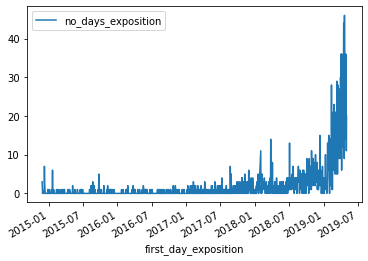

In [35]:
df['no_days_exposition'] = df['days_exposition'].isna() 
df.groupby('first_day_exposition').agg({'no_days_exposition':'sum'}).plot()

In [36]:
# Судя по расcпредению пропусков в колонке с продолжительностью объявления, они ещё не сняты, 
#поэтому их заменим на значение периода между первой датой публикации и последней датой в таблице. 
df['days_exposition_open'] = (df['first_day_exposition'].max() - df['first_day_exposition']).dt.days
df.loc[df['days_exposition'].isna(),'days_exposition'] = df.loc[df['days_exposition'].isna(), 'days_exposition_open']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_corr,liv_corr_y,living_area_medium,kitchen_corr,kitchen_corr_y,kitchen_area_medium,locality_group,cityCenters_nearest_y,no_days_exposition,days_exposition_open
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,NaN,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,57.0,0.472222,0.631667,68.220000,0.231481,0.128571,13.885714,Санкт-Петербург,12.2445,True,57
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81.0,0.460396,0.482488,19.492515,0.272277,0.247839,10.012680,другое,30.3085,False,150
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558.0,0.612500,0.585009,32.760512,0.148214,0.161075,9.020205,Санкт-Петербург,12.2445,False,1352
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.435,9,NaN,False,False,20.442857,0.0,Санкт-Петербург,28098.0,6.800,2.0,84.0,3.0,234.0,424.0,NaN,0.631667,100.435000,NaN,0.128571,20.442857,Санкт-Петербург,12.2445,False,1379
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8.098,2.0,112.0,1.0,48.0,121.0,0.320000,0.585009,58.500914,0.410000,0.161075,16.107510,Санкт-Петербург,12.2445,False,318


In [37]:
df['days_exposition'].isna().sum()

0

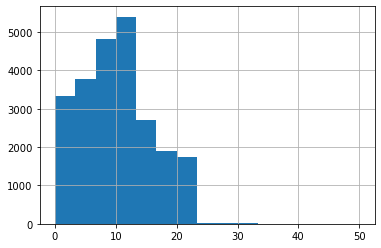

In [38]:
df['total_images'].hist(bins=15) 
# очень маленькие значение для строк с картинками больше 23, похоже на выбросы.

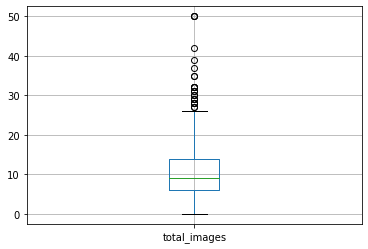

In [39]:
df.boxplot(column='total_images')

In [40]:
df['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [41]:
df['last_price'].describe() 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

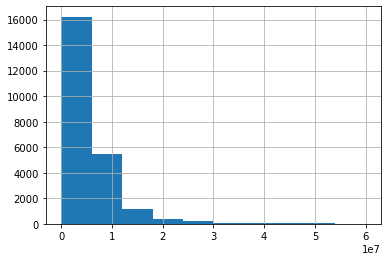

In [42]:
df['last_price'].hist(range=(0,60000000))

## Дополнительные параметры 

In [43]:
# цена квадратного метра
df['square_meter_price'] = df['last_price'] / df['total_area'] 

In [44]:
# цена квадратного метра в тысячах, округленных до целых значений
df['square_meter_price'] = (df['last_price'] / df['total_area'] / 1000).round(0) 

In [45]:
# день недели, месяц и год публикации объявления
df['exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year # год объявления
df['exposition_month1'] = df['first_day_exposition'].values.astype('datetime64[M]') # все месяцы за весь период
df['exposition_month'] = df['first_day_exposition'].dt.month #номер месяца без привязки к году
df['exposition_weekday'] = df['first_day_exposition'].dt.dayofweek # номер дня недели 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_corr,liv_corr_y,living_area_medium,kitchen_corr,kitchen_corr_y,kitchen_area_medium,locality_group,cityCenters_nearest_y,no_days_exposition,days_exposition_open,square_meter_price,exposition_year,exposition_month1,exposition_month,exposition_weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,NaN,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,57.0,0.472222,0.631667,68.220000,0.231481,0.128571,13.885714,Санкт-Петербург,12.2445,True,57,120.0,2019,2019-03-01,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81.0,0.460396,0.482488,19.492515,0.272277,0.247839,10.012680,другое,30.3085,False,150,83.0,2018,2018-12-01,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558.0,0.612500,0.585009,32.760512,0.148214,0.161075,9.020205,Санкт-Петербург,12.2445,False,1352,93.0,2015,2015-08-01,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.435,9,NaN,False,False,20.442857,0.0,Санкт-Петербург,28098.0,6.800,2.0,84.0,3.0,234.0,424.0,NaN,0.631667,100.435000,NaN,0.128571,20.442857,Санкт-Петербург,12.2445,False,1379,408.0,2015,2015-07-01,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8.098,2.0,112.0,1.0,48.0,121.0,0.320000,0.585009,58.500914,0.410000,0.161075,16.107510,Санкт-Петербург,12.2445,False,318,100.0,2018,2018-06-01,6,1


In [46]:
# этаж квартиры; варианты — первый, последний, другой
def floor_disc(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    #if floors_total == 'unknown':
     #   return 'неизвестно'
    return 'другой'
df['floor_disc'] = df.apply(floor_disc, axis=1)

In [47]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей
df['liv_corr'] = df['living_area'] / df['total_area'] # соотношение жилой и общей площади
df['kitchen_corr'] = df['kitchen_area'] / df['total_area'] # соотношение площади кухни к общей

## Исследовательский анализ данных

In [48]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
# Уберем редкие и выбивающиеся значения. 
# Построем гистограммы для каждого параметра.

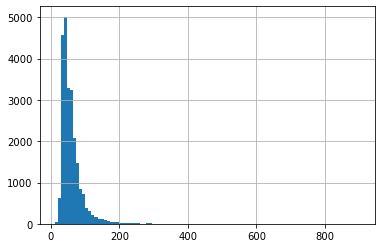

In [49]:
df['total_area'].hist(bins=100)
# количество значений с общей площадью более 190 кв.м. становится близко к оси. Пик около 40 кв.м. 
# распределение выглядит нормально, аномалий не наблюдается

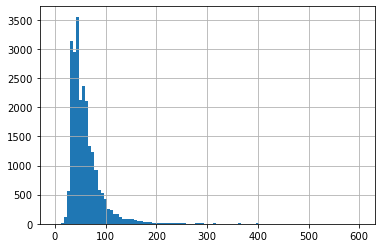

In [50]:
df['total_area'].hist(bins=100, range=(0,600))

In [51]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

(0.0, 200.0)

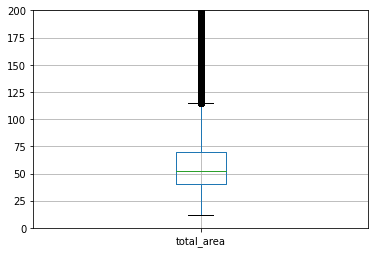

In [52]:
df.boxplot(column='total_area')

plt.ylim(0, 200)

In [53]:
df = df.query('total_area < 190') # уберем значения с площадью больше 190 кв метров
df['total_area'].describe()
# Средняя общая площадь квартиры - 57 кв.метров, медиана - 51. 
# Основной разброс площади квартир находится между 40 и 68 кв метрами. 

count    23434.000000
mean        57.958637
std         25.977845
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        189.000000
Name: total_area, dtype: float64

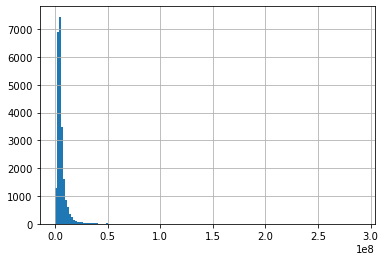

In [54]:
# цена 
df['last_price'].hist(bins=150)

In [55]:
df['last_price'].describe()
# минимальная цена - 1,2 миллиона
# максимальная - 289 миллионов, странный максимум
# средняя цена за квартиру по области составляет 4.6 млн, разброс от 3.4 до 6.7 млн

count    2.343400e+04
mean     5.978338e+06
std      5.764634e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.688750e+06
max      2.892384e+08
Name: last_price, dtype: float64

In [56]:
df = df.query('last_price < 670000000') 
# уберем квартиры с сомнительными ценами выше третьего квартиля млн

In [57]:
df['last_price'].describe()

count    2.343400e+04
mean     5.978338e+06
std      5.764634e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.688750e+06
max      2.892384e+08
Name: last_price, dtype: float64

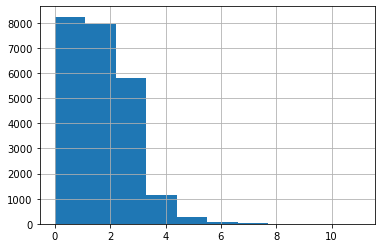

In [58]:
# количество комнат
df['rooms'].hist() # мало строк с 7 и больше комнатами 

In [59]:
df['rooms'].describe()
# Чаще всего продаются двухкомнатные квартиры, обычно от одной до трех. 

count    23434.000000
mean         2.030127
std          0.987627
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [60]:
df['rooms'].value_counts()

1     8045
2     7939
3     5795
4     1128
5      256
0      196
6       56
7       17
11       1
8        1
Name: rooms, dtype: int64

In [61]:
df_not_many_rooms = df.query('rooms < 6')
df_not_many_rooms['rooms'].describe()
# в списке мало значений с большим количеством комнат и они не влияют на средние и медианные показатели.
# эти строки можно оставить в таблице 

count    23359.000000
mean         2.016353
std          0.957925
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

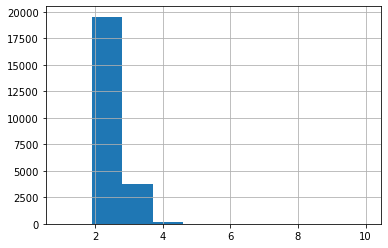

In [62]:
# высота потолка
df['ceiling_height'].hist(range=(1,10))

In [63]:
df['ceiling_height'].describe() 

count    23434.000000
mean         2.719847
std          0.991266
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [64]:
len(df[df['ceiling_height'] > 4])
# выбросов с высокими потолками меньше 1%, можно удалить

63

In [65]:
df = df[df['ceiling_height'] < 5] # уберем выбивающиеся и странные значения высоты потолка

In [66]:
len(df[df['ceiling_height'] <2])
# таких странных маленьких значений не много, похоже на ошибку заполнения, 
# строки можно удалить

3

In [67]:
df = df[df['ceiling_height'] > 1] # уберем квартиры с нереальными потолками в 1 метр.

In [68]:
df['ceiling_height'].describe()
# Обычно потолок составляет 2.7 метров

count    23399.000000
mean         2.691423
std          0.205955
min          1.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

In [69]:
# Изучим время продажи квартиры. Построим гистограмму. 
# Посчитайте среднее и медиану. Сколько обычно занимает продажа?
# Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

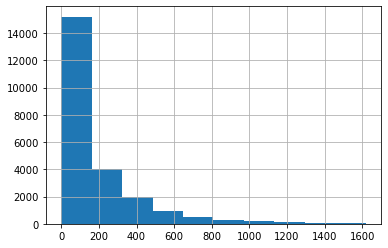

In [70]:
df['days_exposition'].hist() # гистограмма показывает, что некоторые объявления висели больше 3 лет!

In [71]:
df['days_exposition'].describe()
# Среднее время продажи квартиры ~185 дней (полгода)
# Медианное время по продаже квартиры - 93 дней (три месяца)
# очень быстрые продажи - меньше 43 дней 
# долгие продажи - больше 234 дней 
# очень долгие продажи - больше 1000 дней (больше двух с половиной лет)

count    23399.000000
mean       184.110218
std        231.300419
min          0.000000
25%         43.000000
50%         93.000000
75%        234.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [72]:
# Какие факторы больше всего влияют на стоимость квартиры?
# Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 

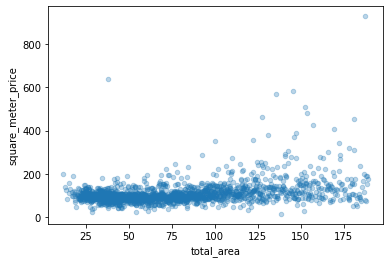

In [73]:
#total_area_corr_2 = df['square_meter_price'].corr(df['total_area']) 
#total_area_corr_2
# 0.24 корреляция между ценой за кв метр и общей площадью слабая или нелинейная
total_area_corr_2 = df.pivot_table(index='total_area', values ='square_meter_price', aggfunc='median')
total_area_corr_2 = total_area_corr_2.reset_index()
total_area_corr_2
total_area_corr_2.plot(x='total_area',y='square_meter_price', kind='scatter', alpha=0.3)
# Цена за квадратный метр слегка повышается с увеличением общей площади квартиры. 

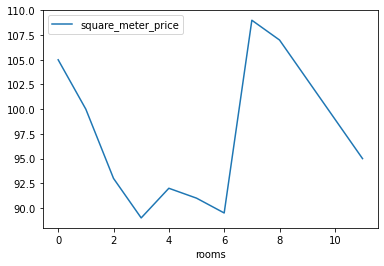

In [74]:
#rooms_corr_2 = df['square_meter_price'].corr(df['rooms']) 
#rooms_corr_2
# -0.01 корреляция между ценой за кв метр и количеством комнат слабая или нелинейная
rooms_corr_2 = df.pivot_table(index='rooms', values ='square_meter_price', aggfunc='median')
rooms_corr_2 = rooms_corr_2.reset_index()
rooms_corr_2
rooms_corr_2.plot(x='rooms',y='square_meter_price')
# цена за квадратный метр меньше всего в трехкомнатных и шестикомнатных квартирах. 
# Самый дорогой квадратный метр в небольших квартирах (студия или однокомнатная) и в большуших (7,8), возможно примиум класса
# Но цены на метр в квартирах с больше чем 8 комнат снова падают (наверное, на такие уже недостаточно спроса)

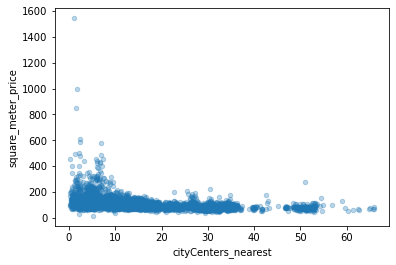

In [75]:
#cityCenters_nearest_corr_2 = df['square_meter_price'].corr(df['cityCenters_nearest']) 
#cityCenters_nearest_corr_2
# -0.5 корреляция между ценой за кв метр и удаленностью от центра отрицательняя и средняя 
#(чем дальше, тем ниже цена за кв метр)
cityCenters_nearest_corr_2 = df.pivot_table(index='cityCenters_nearest', values ='square_meter_price', aggfunc='median')
cityCenters_nearest_corr_2 = cityCenters_nearest_corr_2.reset_index()
cityCenters_nearest_corr_2
cityCenters_nearest_corr_2.plot(x='cityCenters_nearest',y='square_meter_price', kind='scatter', alpha=0.3)

In [76]:
floor_corr = df.pivot_table(index='floor_disc',values = 'square_meter_price', aggfunc='median')
floor_corr.sort_values(by='square_meter_price')

,square_meter_price
floor_disc,
первый,81.0
последний,87.0
другой,98.0


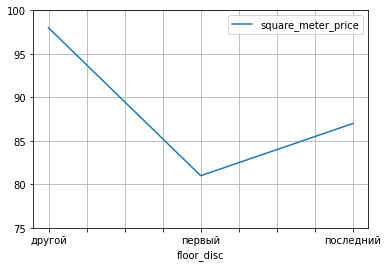

In [77]:
floor_corr.plot(grid=True, ylim=(75,100),figsize=(6, 4))
#наблюдается корреляция между этажом и ценой: квартиры на первом этаже дешевле всего, 
# потом идут квартиры на последнем этаже, а квартиры с промежуточными этажами ценятся выше других друх групп. 

In [78]:
# Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [79]:
# зависимость от года 
exposition_year_corr = df.pivot_table(index='exposition_year',values = 'square_meter_price', aggfunc='median')
exposition_year_corr.sort_values(by='square_meter_price')

,square_meter_price
exposition_year,
2016,92.0
2017,92.0
2015,93.0
2018,96.0
2019,103.0
2014,106.0


In [80]:
df['exposition_year'].value_counts()
# за 2014 и 2015 было  не очень много продаж в сравнении со следующими годами, 
# поэтому значения по ценам не очень репрезентативны за этот период

2018    8440
2017    8078
2019    2849
2016    2742
2015    1157
2014     133
Name: exposition_year, dtype: int64

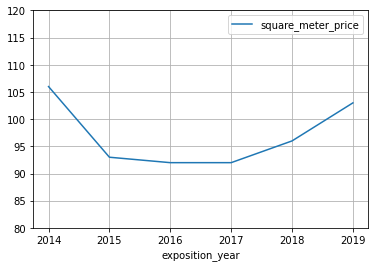

In [81]:
exposition_year_corr.plot(grid=True,ylim=(80,120), figsize=(6, 4))
# Данных за 2014 недостаточно много, чтобы делать точные выводы. 
# Квартиры с 2015 года до 2017 года стоили примерно столько же с небольшим понижением на начало 2016 года, 
# а с 2017 года цены стали расти. 

In [82]:
# зависимость от месяца размещения 
exposition_month_corr = df.pivot_table(index='exposition_month',values = 'square_meter_price', aggfunc='median')
exposition_month_corr.sort_values(by='square_meter_price')

,square_meter_price
exposition_month,
5,93.0
6,93.0
10,94.0
12,94.0
1,95.0
2,95.0
3,95.0
7,95.0
11,95.0


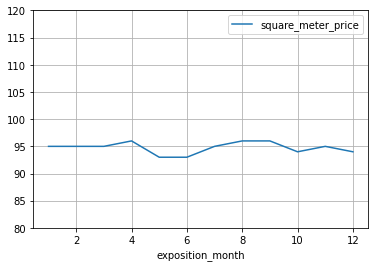

In [83]:
exposition_month_corr.plot(grid=True,ylim=(80,120), figsize=(6, 4))
# Пик цен приходится на апрель, август и ноябрь, дешевле всего квартиры продавались в мае и июне, начале осени, конце года.
# Снижение цен в мае и июне может быть связано с отпуском или дачным сезоном, когда людей в городах остается меньше. 
# Небольшое понижение в сентябре может быть связано с заботами в начале учебного года. 
# Перед новым годом тоже снижается активность из-за подготовки к новому году. 

In [84]:
# Зависимость цен от дня недели 
exposition_weekday_corr = df.pivot_table(index='exposition_weekday',values = 'square_meter_price', aggfunc='median')
exposition_weekday_corr.sort_values(by='square_meter_price')

,square_meter_price
exposition_weekday,
5,93.0
4,94.0
6,94.0
0,95.0
2,95.0
3,95.0
1,96.0


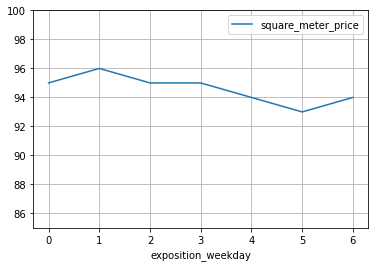

In [85]:
exposition_weekday_corr.plot(grid=True,ylim=(85,100), figsize=(6, 4))
# квартиры проданные в начале недели оказываются дороже других, а самые дешевые продаются чаще в субботу. 
# Или, по крайней мере, в этот день объявление снимают с продажи.

In [86]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
#Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

locality = df
locality['key'] = 1
locality = locality.pivot_table(index='locality_name', values='key', aggfunc='sum')
locality_top_10 = locality.sort_values(by='key', ascending = False).head(10)
locality_top_10 
# населенные пункты с наибольшим количеством объявлений

,key
locality_name,
Санкт-Петербург,15452
посёлок Мурино,520
посёлок Шушары,440
Всеволожск,398
Пушкин,363
Колпино,337
посёлок Парголово,326
Гатчина,306
деревня Кудрово,299


In [87]:
locality_top_10_table = df[df['locality_name'].isin(('Санкт-Петербург', 'посёлок Мурино','посёлок Шушары','Всеволожск','Пушкин','Колпино','посёлок Парголово','Гатчина','деревня Кудрово','Выборг') )]
locality_top_10_price = locality_top_10_table.groupby('locality_name')['square_meter_price'].mean() 
#выберем из общей таблицы строки по топ-10 населенным пунктам, сгруппируем их по названию и 
# выведем для них среднюю цену за квадратный метр
locality_top_10_price = locality_top_10_price.reset_index()
locality_top_10_price.sort_values(by='square_meter_price') # отсортируем 
#Среди 10 населенных пунктов с самым большим количеством объявлений, самые дорогие квартиры в Санкт-Петербурге, 
#а самые дешевые - в Выборге

,locality_name,square_meter_price
1,Выборг,58.097046
0,Всеволожск,68.645729
2,Гатчина,68.761438
3,Колпино,75.338279
9,посёлок Шушары,78.700000
7,посёлок Мурино,85.705769
8,посёлок Парголово,90.297546
6,деревня Кудрово,92.508361
4,Пушкин,103.044077
5,Санкт-Петербург,113.315040


In [88]:
# Возьмем строки с объявлением только для С-Петербурга
peter = df.loc[df['locality_name'] == 'Санкт-Петербург'].reset_index()
# округлим расстрояние до центра в километрах до целых значений
peter['cityCenters_nearest'] = peter['cityCenters_nearest'].round(0) 
# Посчитаем среднюю цену для каждого километра
peter_price_per_km = peter.pivot_table(index='cityCenters_nearest', values='square_meter_price', aggfunc ='mean')
peter_price_per_km

,square_meter_price
cityCenters_nearest,
0.0,223.480000
1.0,155.321429
2.0,149.944056
3.0,120.495601
4.0,128.308980
5.0,137.180974
6.0,146.764808
7.0,153.823529
8.0,124.061433


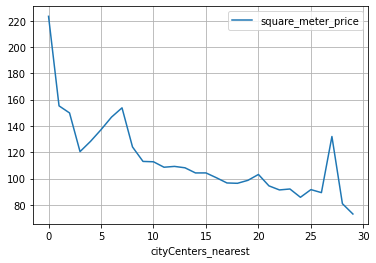

In [89]:
#Построим график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется — это и будет центральная зона.
peter_price_per_km.plot(grid=True,figsize=(6, 4))
# до седьмого километра включительно радиус можно считать центром, с седьмого километра цена резко падает. 

In [90]:
# Выделим сегмент квартир в центре. 
#Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [91]:
# Примем, что центр Санкт-Петербурга находится в радиусе 7 км от центральной точки. 
peter_center = peter.query('cityCenters_nearest < 8').reset_index()

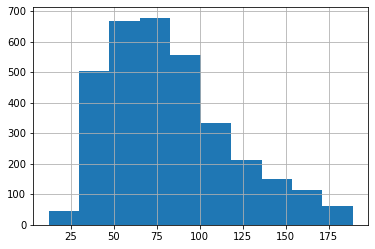

In [92]:
#Площадь квартир в центре
peter_center['total_area'].hist() 

In [93]:
peter_center['total_area'].describe()
# В центре Санкт-Петербурга продавались крошечные квартиры по 12 кв метров, самая большая - 189 кв м. 
# Обычно, метраж квартиры составлял 76 кв метров. 

count    3321.000000
mean       82.552204
std        35.671480
min        12.000000
25%        55.500000
50%        76.000000
75%       102.700000
max       189.000000
Name: total_area, dtype: float64

In [94]:
#Цена на общую площадь 
peter_center['last_price'].describe()
#Минимальная цена за квартиру в Питере составляла 1,6 миллионов
#Обычно, квартира в центре продавалась за ~9 миллионов. 

count    3.321000e+03
mean     1.193193e+07
std      1.121246e+07
min      1.600000e+06
25%      6.500000e+06
50%      8.900000e+06
75%      1.300000e+07
max      2.892384e+08
Name: last_price, dtype: float64

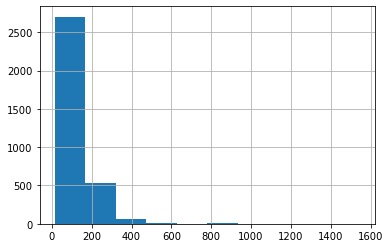

In [95]:
#Распределение по цене за метр 
peter_center['square_meter_price'].hist() 

In [96]:
peter_center['square_meter_price'].describe()
# минимальная цена за квадратный километр составляла в центре 15 тыс (подозрительно!)
# Обычно, цена за квадратный метр в центре Петербурга состаляла 123 тыс. 

count    3321.000000
mean      140.080096
std        75.078888
min        15.000000
25%       100.000000
50%       123.000000
75%       154.000000
max      1543.000000
Name: square_meter_price, dtype: float64

In [97]:
df['square_meter_price'].describe()
# по всем объявлением разброс цены за метр от 77 до 114 тыс

count    23399.000000
mean        98.265054
std         43.997979
min          0.000000
25%         77.000000
50%         95.000000
75%        114.000000
max       1543.000000
Name: square_meter_price, dtype: float64

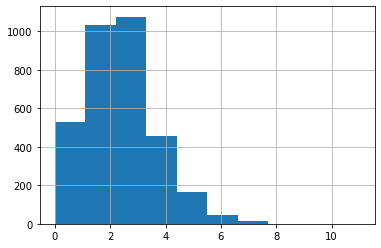

In [98]:
# Распределение по количеству комнат
peter_center['rooms'].hist()  

In [99]:
peter_center['rooms'].describe() 
# В центре продавались квартиры типа студии и квартиры с 11 комантами, но обычно это была квартира с тремя комнатами. 

count    3321.000000
mean        2.666366
std         1.193145
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64

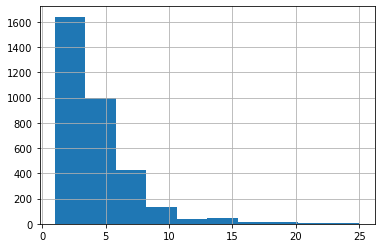

In [100]:
# Распредение по этажам
peter_center['floor'].hist()    

In [101]:
peter_center['floor'].describe()  
# Чаще всего продавались квартиры на четвёртом этаже

count    3321.000000
mean        4.171635
std         2.954788
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        25.000000
Name: floor, dtype: float64

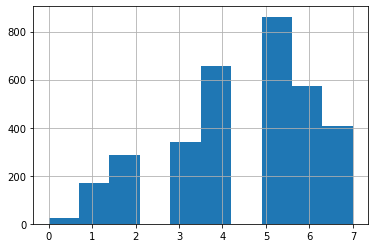

In [102]:
# Распредение по удаленности от центра
peter_center['cityCenters_nearest'].hist()   

In [103]:
peter_center['cityCenters_nearest'].describe() 
# Квартиры в пяти километрах от центра продавались чаще других. 

count    3321.000000
mean        4.517013
std         1.677212
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: cityCenters_nearest, dtype: float64

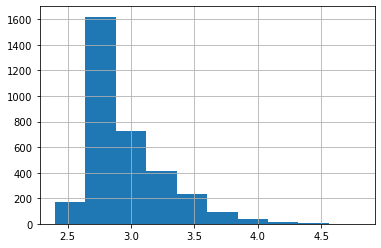

In [104]:
# Распредение по высоте потолка 
peter_center['ceiling_height'].hist()   

In [105]:
peter_center['ceiling_height'].describe()   
# Средняя высота потолка в центральной квартире составляет 2.8 метра. 

count    3321.000000
mean        2.919112
std         0.337694
min         2.400000
25%         2.650000
50%         2.800000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64

Можно зациклить вывод плотов для цены за квадратный метр по параметрам "этаж", "год", "месяц" и "день недели".

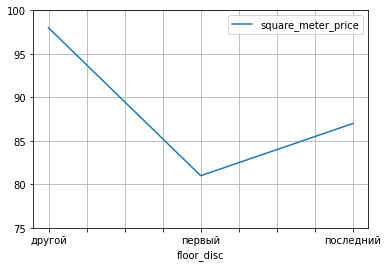

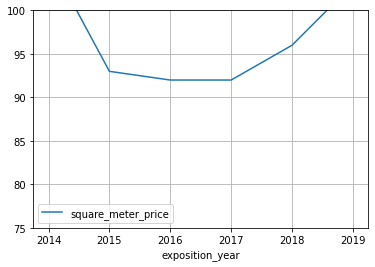

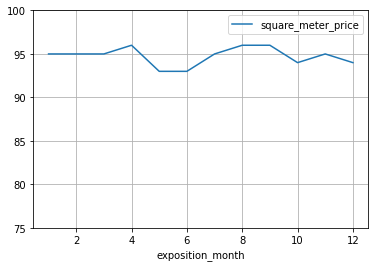

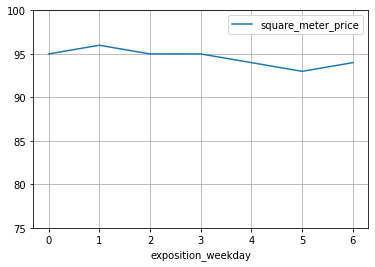

In [106]:
df_plots = df[['floor_disc','exposition_year','exposition_month','exposition_weekday']]
for element in df_plots:
    (df.pivot_table(index=element,values = 'square_meter_price', aggfunc='median')
    .plot(grid=True, ylim=(75,100),figsize=(6, 4))   )
    

In [107]:
#Также выделим следующие факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, 
#дата размещения объявления. 

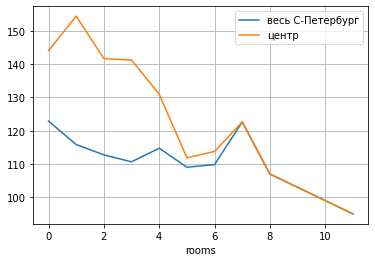

In [108]:
# Распредение по комнатам в центре и по городу 
rooms_in_peter = peter.pivot_table(index='rooms', values='square_meter_price', aggfunc ='mean').reset_index()
rooms_in_peter_center = peter_center.pivot_table(index='rooms', values='square_meter_price', aggfunc ='mean').reset_index()
rooms_in_peter_corr=(rooms_in_peter
                     .rename(columns={'square_meter_price':'весь С-Петербург'})
                     .plot(x='rooms', y='весь С-Петербург',grid=True,figsize=(6, 4)))
rooms_in_peter_center_corr = (rooms_in_peter_center
                              .rename(columns={'square_meter_price':'центр'})
                              .plot(ax=rooms_in_peter_corr, x='rooms', y='центр', grid=True,figsize=(6, 4))) 
# Цена за квадратный метр в студии обычно дороже, чем в однокомнатной квартире, но не в центре  - там наоборот.
# В обеих выборках цена за квадратный метр снижается с увеличением количетсва комнат  с одной до 5,
# но в выборке по городу есть пик для квартир с четырьми комнатами. 
# Для обеих выборок есть так же пик цен за квартиры с семью комнатами, а потом снижение.
# Возможно, спрос на такие большие квратиры не такой уж и большой 
#(люди, может, любят больше жить отдельно, а не большими семьями)

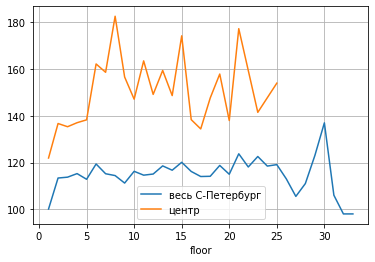

In [109]:
# Распредение по этажам
floor_in_peter = peter.pivot_table(index='floor', values='square_meter_price', aggfunc ='mean').reset_index()
floor_in_peter_center = peter_center.pivot_table(index='floor', values='square_meter_price', aggfunc ='mean').reset_index()
floor_in_peter_corr=(floor_in_peter
                     .rename(columns={'square_meter_price':'весь С-Петербург'})
                     .plot(x='floor', y='весь С-Петербург',grid=True,figsize=(6, 4)))
floor_in_peter_center_corr = (floor_in_peter_center
                              .rename(columns={'square_meter_price':'центр'})
                              .plot(ax=floor_in_peter_corr, x='floor', y='центр', grid=True,figsize=(6, 4)))
#Пики цен в центре приходятся на 8, 15 и 21 этажи. Возможно, это квартиры с мансардами на последних этажах. 
# По году эти пики сглажены, совпадают с центром на отметках 6, 15 и 21. 
# Самый высокий пик цен по городу приходится на 30 этаж, возможно это тоже последние этажи с мансардами. 

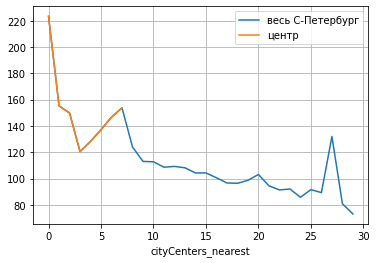

In [110]:
#cityCenters_nearest
cityCenters_nearest_in_peter = peter.pivot_table(index='cityCenters_nearest', values='square_meter_price', aggfunc ='mean').reset_index()
cityCenters_nearest_in_peter_center = peter_center.pivot_table(index='cityCenters_nearest', values='square_meter_price', aggfunc ='mean').reset_index()
cityCenters_nearest_in_peter_corr=(cityCenters_nearest_in_peter
                     .rename(columns={'square_meter_price':'весь С-Петербург'})
                     .plot(x='cityCenters_nearest', y='весь С-Петербург',grid=True,figsize=(6, 4)))
cityCenters_nearest_in_peter_center_corr = (cityCenters_nearest_in_peter_center
                              .rename(columns={'square_meter_price':'центр'})
                              .plot(ax=cityCenters_nearest_in_peter_corr, x='cityCenters_nearest', y='центр', grid=True,figsize=(6, 4)))

# Самые дорогие квартиры в самом центре, потом есть пик на седьмом километре радиуса, а после этого резкое падение. 
# На расстоянии 28 км есть очередной пик, возможно на этом радиусе находится центр какого-то областного города, 
# который официально является частью Санкт-Петербурга, например Красное Село. 

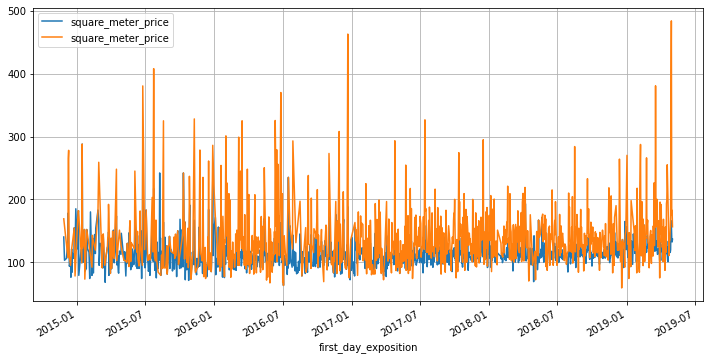

In [111]:
#first_day_exposition
exposition_in_peter = peter.pivot_table(index='first_day_exposition', values='square_meter_price', aggfunc ='mean').reset_index()
exposition_in_peter_center = (peter_center
                              .pivot_table(index='first_day_exposition', values='square_meter_price', aggfunc ='mean')
                              .reset_index())
exposition_in_peter_corr=(exposition_in_peter
                          .plot(x='first_day_exposition', y='square_meter_price',grid=True,figsize=(12, 6)))
exposition_in_peter_center_corr = (exposition_in_peter_center
                                   
                                   .plot(ax=exposition_in_peter_corr, x='first_day_exposition', y='square_meter_price', grid=True,figsize=(12, 6)))

# слишком рябит, поэтому укрупним по месяцам

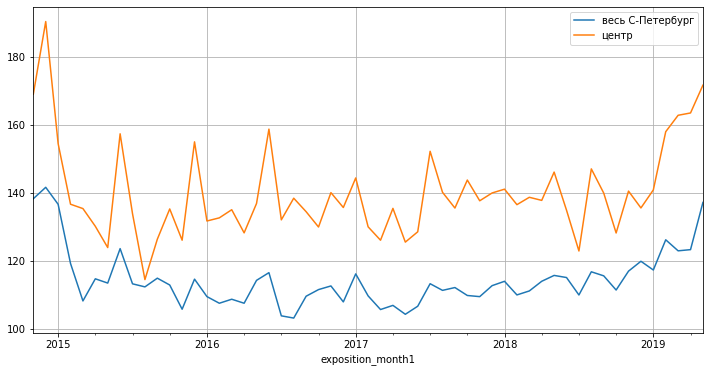

In [112]:
#first_day_exposition
exposition_in_peter = peter.pivot_table(index='exposition_month1', values='square_meter_price', aggfunc ='mean').reset_index()
exposition_in_peter_center = peter_center.pivot_table(index='exposition_month1', values='square_meter_price', aggfunc ='mean').reset_index()
exposition_in_peter_corr=(exposition_in_peter
                          .rename(columns={'square_meter_price':'весь С-Петербург'})
                          .plot(x='exposition_month1', y='весь С-Петербург',grid=True,figsize=(12, 6)))
exposition_in_peter_center_corr = (exposition_in_peter_center
                                   .rename(columns={'square_meter_price':'центр'})
                                   .plot(ax=exposition_in_peter_corr, x='exposition_month1', y='центр', grid=True,figsize=(12, 6)))

# Наблюдается та же тенденция, что и для всех объявлений области:
# Пики более-менее совпадают по всему городу и в центре. 
# В конце 2014 года был пик цен, но данных было не очень много. 
# Данные за 2019 год пока не достаточно информативны, так как в выборке находятся объявления с ещё не проданныими квартирами, 
# так что цена на них ещё может упасть на момент продажи. 

## Общий вывод

Мы установили параметры квартир в Ленинградской области:
1. Общая площадь квартир: по всей области между 40 и 68 квадратными метрами, в центре Петербурга от 55 до 102
2. Цена квартир варьируется по области от 3.4 до 6.7 млн руб, в центре Петербурга от 6.5 до 12
3. Цена за квадратный метр по области от 77 до 114, в центре от 100 до 154 тыс.
3. Обычно, в объявлениях квартиры с одной до трех комнат. 
4. Потолок по области 2.7 метров, а в центре - 2.8
5. Время продажи составляет, обычно, от 43 до 234 дней. 

Зависимости цены от других параметров: 
1. Цена за квадратный метр меньше всего в трехкомнатных, шестикомнатных квартирах и в квартирах с больше, чем 8 комнат. 
2. Самый дорогой квадратный метр либо в небольних квартирах до двух комнат, либо в квартире с семи комнатами. 
3. Цена за квадратный метр понижается с удалением от цента. 
4. На первом этаже самые недорогие квартиры, потом идут квартиры на последнем этаже, потом остальные. 
5. Пик цен приходится на апрель, август и ноябрь, дешевле всего квартиры продаются в мае и июне, начале осени, конце года.
6. Квартиры проданные в начале недели оказываются дороже других, а самые дешевые продаются чаще в субботу.